In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastf1
import plotly.express as px
import fastf1.plotting
import datetime
import requests
from datetime import timedelta

fastf1.Cache.enable_cache('../f1_cache')  

In [2]:
selected_year = 2022
fastf1_session = fastf1.get_session(selected_year, 'Emilia Romagna', 'Race')
fastf1_session.load(telemetry=True, laps=True, weather=True)

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '63', '77', '16', '22', '5', '20', '18', '23', '10', '44', '31', '24', '6', '47', '3', '14', '55']


# LapTime vs LapNumber

In [37]:
selected_drivers = ['HAM', 'RIC']
lap_time_number = fastf1_session.laps[['Driver', 'LapTime', 'Compound', 'TyreLife', 'LapNumber']].copy()
lap_time_number = lap_time_number[lap_time_number['Driver'].isin(selected_drivers)]
lap_time_number['LapTime'] = lap_time_number['LapTime'].fillna(timedelta(0))
lap_time_number['Compound'] = lap_time_number['Compound'].fillna("")
lap_time_number['Year'] = selected_year
lap_time_number['TyreLife'] = lap_time_number['TyreLife'].fillna(-1)
lap_time_number['LapTime'] = pd.to_numeric(lap_time_number['LapTime'])/1000000
lap_time_number_cov = lap_time_number.to_dict('records')
final_dict = {}
for data in lap_time_number_cov:
    primary_key = data['Driver']
    data[primary_key] = data.pop('LapTime')

    # color
    driv_lap = fastf1_session.laps.pick_driver(primary_key).pick_fastest()
    color = fastf1.plotting.team_color(driv_lap['Team'])
    data['color'] = color

    if primary_key not in final_dict:
        final_dict[primary_key] = [data]
    else:
        final_dict[primary_key].append(data)

# for driv in final_dict:
#     thelist = final_dict[driv]
#     thelist[:] = [d for d in thelist if d.get(driv) != 0]

# Team Color Setup

In [93]:
team_color_pair = {'Red Bull Racing': '#0600ef',
 'Williams': '#ADD8E6',
 'Mercedes': '#900000',
 'AlphaTauri': '#3e454d',
 'Alpine': '#0090ff',
 'Ferrari': '#dc0000',
 'Alpha Romeo': '#900000',
 'Haas': '#ffffff',

 'McLaren': '#ffa112',

 'Aston Martin': '#006f62',
}

In [95]:
selected_drivers = ['VER', 'PER', 'RUS', 'LAT', 'BOT', "HAM", 'GAS', 'ALO', 'OCO', 'SAI', 'LEC', 'RAI', 'GIO', 'MSC', 'TSU', 'MAZ', 'NOR', 'RIC', 'VET', 'STR', 'HUL', 'MAG', 'ZHO']
for driver in selected_drivers:
    driv_lap = fastf1_session.laps.pick_driver(driver).pick_fastest()
    print(driv_lap['Team'])
    # try:
    #     team = driv_lap['Team']
    #     color = team_color_pair[team]
    # except:
    #     color = "#fffff"

Red Bull Racing
Red Bull Racing
Mercedes
Williams
Alfa Romeo
Mercedes
AlphaTauri
Alpine
Alpine
nan
Ferrari
nan
nan
Haas F1 Team
AlphaTauri
nan
McLaren
McLaren
Aston Martin
Aston Martin
nan
Haas F1 Team
Alfa Romeo


/Users/harsh/miniconda3/envs/f1/lib/python3.9/site-packages/fastf1/core.py:2082: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


# Telemetry

In [46]:
selected_drivers = ['HAM', 'ALO', 'LAT']

driv_tel = {}
for driver in selected_drivers:
    driv_lap = fastf1_session.laps.pick_driver(driver).pick_fastest()
    color = fastf1.plotting.team_color(driv_lap['Team'])
    driv_tel[driver] = driv_lap.get_telemetry(
    )[['Speed', 'Distance', 'RPM', 'nGear', 'Throttle', 'Brake', 'DRS', 'X', 'Y']]
    driv_tel[driver]['Brake'] = driv_tel[driver]['Brake'].astype(int)
    driv_tel[driver]['color'] = color
    driv_tel[driver] = driv_tel[driver].to_dict('records')

# Map Plot

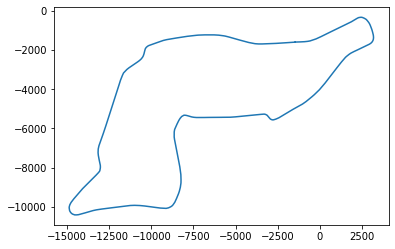

In [241]:
lap = fastf1_session.laps.pick_fastest()
tel = lap.get_telemetry()

x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)
plt.plot(x, y)
plt.show()

points = np.array([x, y]).T.reshape(-1, 1, 2)
# segments = np.concatenate([points[:-1], points[1:]], axis=1)
# gear = tel['nGear'].to_numpy().astype(float)

# Fastest Lap Comparisons
Which sectors/turn did a driver gain time over another?

In [3]:
ham_tele = fastf1_session.laps.pick_driver("HAM").pick_fastest().get_telemetry()
lec_tele = fastf1_session.laps.pick_driver("LEC").pick_fastest().get_telemetry()

In [262]:
data = ham_tele[['X', 'Y', 'Speed']].to_dict('records')
data

[{'X': -1500, 'Y': -1606, 'Speed': 286},
 {'X': -1533, 'Y': -1607, 'Speed': 287},
 {'X': -1545, 'Y': -1607, 'Speed': 288},
 {'X': -1784, 'Y': -1621, 'Speed': 291},
 {'X': -1880, 'Y': -1627, 'Speed': 291},
 {'X': -1953, 'Y': -1630, 'Speed': 292},
 {'X': -2078, 'Y': -1637, 'Speed': 295},
 {'X': -2109, 'Y': -1639, 'Speed': 296},
 {'X': -2235, 'Y': -1645, 'Speed': 297},
 {'X': -2323, 'Y': -1651, 'Speed': 298},
 {'X': -2470, 'Y': -1659, 'Speed': 300},
 {'X': -2473, 'Y': -1660, 'Speed': 300},
 {'X': -2605, 'Y': -1666, 'Speed': 300},
 {'X': -2672, 'Y': -1669, 'Speed': 301},
 {'X': -2807, 'Y': -1673, 'Speed': 302},
 {'X': -2820, 'Y': -1673, 'Speed': 303},
 {'X': -3027, 'Y': -1680, 'Speed': 303},
 {'X': -3047, 'Y': -1680, 'Speed': 304},
 {'X': -3231, 'Y': -1688, 'Speed': 305},
 {'X': -3288, 'Y': -1690, 'Speed': 306},
 {'X': -3486, 'Y': -1695, 'Speed': 306},
 {'X': -3511, 'Y': -1695, 'Speed': 307},
 {'X': -3690, 'Y': -1692, 'Speed': 309},
 {'X': -3729, 'Y': -1689, 'Speed': 311},
 {'X': -3947, 'Y

# Turn/St Line Analysis 

In [4]:
ham_tele = fastf1_session.laps.pick_driver("HAM").pick_fastest().get_telemetry()
lec_tele = fastf1_session.laps.pick_driver("LEC").pick_fastest().get_telemetry()

In [31]:
# len(ham_tele)/8
new = []
new[80] = 'm'
# ham_tele['Markers'] = 

IndexError: list assignment index out of range

In [25]:
import plotly.graph_objects as go
fig  = go.Figure()
fig.add_trace(go.Scatter(x=ham_tele['Distance'], y=ham_tele['Speed']))
fig.add_trace(go.Scatter(x=lec_tele['Distance'], y=lec_tele['Speed']))
fig.show()

In [27]:
# plt.plot(dataH['X'], dataH['Y'], color=dataH['Speed'])
# plt.plot(dataH['Speed'])
fig = px.line(ham_tele, x='X', y='Y')
fig.show()

# Weather

In [138]:
fastf1_session.weather_data

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:43.040000,20.9,56.4,1014.8,False,29.9,6,1.0
1,0 days 00:01:43.040000,20.8,56.8,1014.8,False,29.9,8,1.1
2,0 days 00:02:43.040000,20.8,56.8,1014.7,False,30.2,11,1.0
3,0 days 00:03:43.039000,20.8,56.7,1014.8,False,30.2,7,1.0
4,0 days 00:04:43.041000,20.8,56.1,1014.8,False,29.9,0,0.9
...,...,...,...,...,...,...,...,...
128,0 days 02:08:43.160000,20.5,54.2,1015.2,False,26.0,1,0.6
129,0 days 02:09:43.158000,20.6,53.6,1015.2,False,26.1,5,0.7
130,0 days 02:10:43.158000,20.6,52.6,1015.1,False,26.2,8,0.9
131,0 days 02:11:43.162000,20.6,52.7,1015.2,False,26.2,21,1.0


In [139]:
fastf1_session.laps.pick_fastest().get_weather_data

<bound method Lap.get_weather_data of Time                      0 days 02:09:51.444000
DriverNumber                                  77
LapTime                   0 days 00:01:32.090000
LapNumber                                   56.0
Stint                                        4.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:29.640000
Sector2Time               0 days 00:00:39.508000
Sector3Time               0 days 00:00:22.942000
Sector1SessionTime        0 days 02:08:48.994000
Sector2SessionTime        0 days 02:09:28.502000
Sector3SessionTime        0 days 02:09:51.444000
SpeedI1                                    239.0
SpeedI2                                    266.0
SpeedFL                                    279.0
SpeedST                                    293.0
IsPersonalBest                              True
Compound                                  MEDIUM
TyreLife                       

In [184]:
# fastf1_session.laps.pick_fastest().get_telemetry
# fastf1_session.laps.pick_track_status(how="equals", status='1')
# fastf1_session.laps.pick_driver("HAM").pick_fastest()
# fastf1_session.laps.pick_driver("HAM").get_telemetry().slice_by_lap(ref_laps=fastf1_session.laps.pick_driver("BOT").pick_fastest())